**1. Importing the necessary libraries**


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential
import matplotlib.pyplot as plt 
%matplotlib inline
import cv2
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**2. Define the CNN model**


In [3]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**3. Compile the model**


In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

**4. Load and preprocess the data**


In [5]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [7]:
training_set = train_datagen.flow_from_directory(
    r"C:\Users\asus\Desktop\Metal_casting_product_image_classification_for_quality_inspection-master\Metal_casting_product_image_classification_for_quality_inspection-master\casting\train",
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 6633 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory(
    r"C:\Users\asus\Desktop\Metal_casting_product_image_classification_for_quality_inspection-master\Metal_casting_product_image_classification_for_quality_inspection-master\casting\test",
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 715 images belonging to 2 classes.


**5. Train the model**


In [10]:
result = model.fit(
    training_set,
    epochs=10,
    validation_data=test_set
)

c:\Users\asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 66s 308ms/step - accuracy: 0.7122 - loss: 0.5390 - val_accuracy: 0.8238 - val_loss: 0.3559
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.8844 - loss: 0.2812 - val_accuracy: 0.9259 - val_loss: 0.1905
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.9187 - loss: 0.2024 - val_accuracy: 0.9231 - val_loss: 0.1727
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9408 - loss: 0.1545 - val_accuracy: 0.9413 - val_loss: 0.1372
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.9516 - loss: 0.1261 - val_accuracy: 0.9483 - val_loss: 0.1072
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9720 - loss: 0.0860 - val_accuracy: 0.9790 - val_loss: 0.0735
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9720 - loss: 0.0807 - val_accuracy: 0.9888 - val_loss: 0.0490
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.9842 - loss: 0.0532 -

**6. Plotting the training and validation loss**


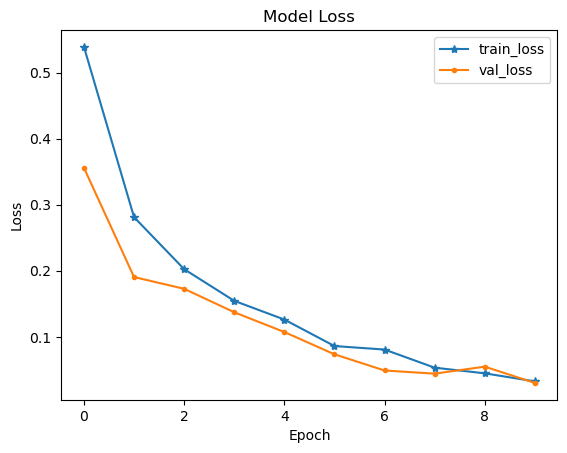

In [11]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(result.history['loss'], label='train_loss', marker = '*')
plt.plot(result.history['val_loss'], label='val_loss',marker= '.')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**7. Plotting the training and validation accuracy**


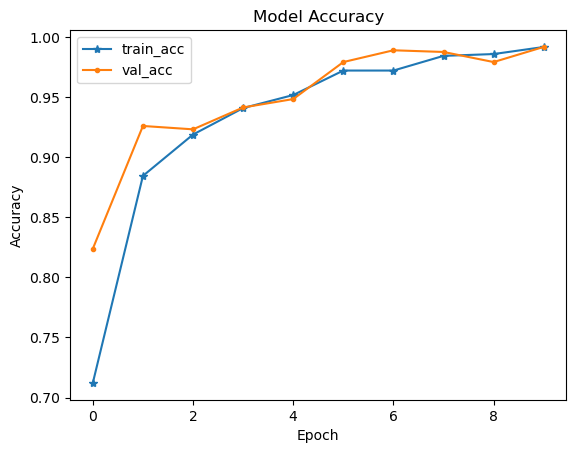

In [12]:
# Plot the training and validation accuracy
plt.plot(result.history['accuracy'], label='train_acc' , marker = '*')
plt.plot(result.history['val_accuracy'], label='val_acc' , marker = '.')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**8. Save the model**


In [15]:
os.chdir(os.getcwd())

In [17]:
model.save('CNN_casting_classifiers.keras')

**9. Define a function to make predictions using the saved model**


In [2]:
# Load the model saved in .keras format
model = keras.models.load_model('CNN_casting_classifiers.keras')

c:\Users\asus\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
def model_output(path):
    # Preprocess the image
    img = keras.preprocessing.image.load_img(path, target_size=(64, 64))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.0   # normalize to [0,1]

    # Predict
    prob = model.predict(img_array, verbose=0)[0][0]

    # Show image and probability
    plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    print('Probability:', prob)
    if prob > 0.5:
        print("Casting is ok")
    else:
        print("Casting is defective")

**10. Use the function to make a prediction**


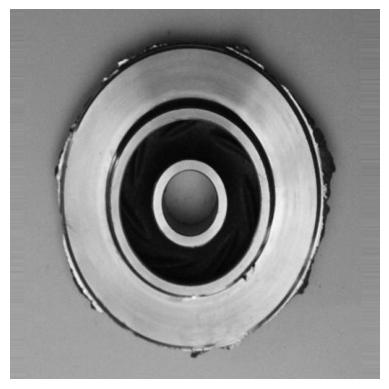

Probability: 0.00013081805
Casting is defective


In [4]:
model_output("casting/casting_image/def_front/cast_def_0_0.jpeg")

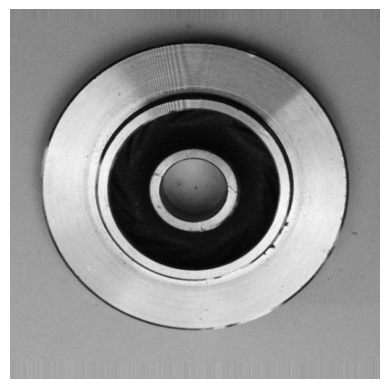

Probability: 0.00016260582
Casting is defective


In [5]:
model_output("casting/casting_512x512/def_front/cast_def_0_240.jpeg")

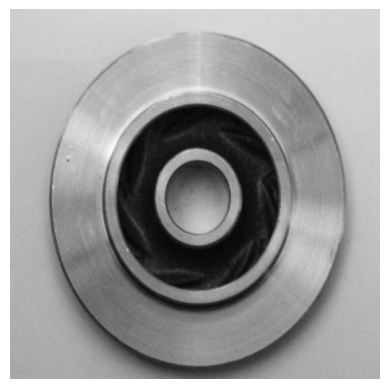

Probability: 0.993945
Casting is ok


In [6]:
model_output("casting/casting_512x512/ok_front/cast_ok_0_35.jpeg")

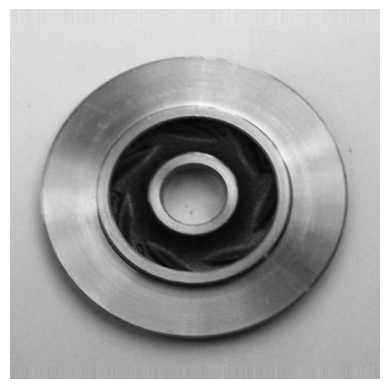

Probability: 0.99989885
Casting is ok


In [7]:
model_output("casting/casting_512x512/ok_front/cast_ok_0_601.jpeg")

**11. Scores**


Found 715 images belonging to 2 classes.


c:\Users\asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - accuracy: 0.9916 - loss: 0.0301

✅ Test Accuracy: 99.16%
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

📊 Classification Report:

              precision    recall  f1-score   support

   Defective       1.00      0.99      0.99       453
          OK       0.98      1.00      0.99       262

    accuracy                           0.99       715
   macro avg       0.99      0.99      0.99       715
weighted avg       0.99      0.99      0.99       715



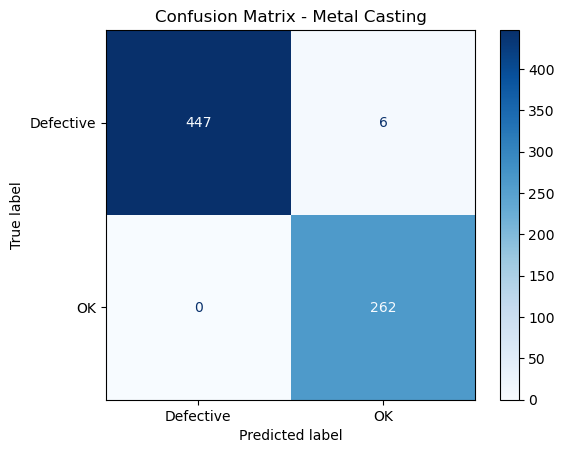

In [ ]:
# Path to test data
test_dir = "casting/test"

# Create a test data generator (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),   # must match training size
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# Predictions
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype("int32").ravel()

# True labels
y_true = test_generator.classes

# Classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=["Defective", "OK"]))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Defective", "OK"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Metal Casting")
plt.show()
